In [27]:
import numpy as np 
c = np.array([[[1, 0, 0], [0, 0, 0], [0, 55, 0]], [[9, 8, 4], [4, 8, 7], [30, 6, 22]]])

print(c)

[[[ 1  0  0]
  [ 0  0  0]
  [ 0 55  0]]

 [[ 9  8  4]
  [ 4  8  7]
  [30  6 22]]]


In [28]:
print(c.shape)

(2, 3, 3)


In [29]:
print(c.shape[0])

2


In [30]:
TL_slice = c[0, :, :]

print(TL_slice)
print(TL_slice.shape)

print(TL_slice.shape[0]) # shapeは形状を返すメソッドなので形状の情報が入手できる


[[ 1  0  0]
 [ 0  0  0]
 [ 0 55  0]]
(3, 3)
3


In [25]:
### これだと，行の中に非零成分が含まれるような行のindexを取得するコードになってる
last_link = []

for l in range((TL_slice).shape[0]): #  shape0が行数，shape1が列数に対応すると考えるとスムーズか
    print(f'lは{l}')
    row = TL_slice[l, :]
    print(f'rowは{row}')
    if np.any(row != 0):
        last_link.append(l)

print(f'last_linkは{last_link}')

lは0
rowは[1 0 0]
lは1
rowは[0 0 0]
lは2
rowは[ 0 55  0]
last_linkは[0, 2]


In [26]:
### 各列を見て，1つでも非零な成分があるような列を取得したい
last_link2 = []

for l in range((TL_slice).shape[1]): # 列で見たいので，shape[1]で．
    print(f'lは{l}')
    col = TL_slice[:, l]
    print(f'colは{col}')
    if np.any(col != 0):
        last_link2.append(l)

print(f'last_link2は{last_link2}')

lは0
colは[1 0 0]
lは1
colは[ 0  0 55]
lは2
colは[0 0 0]
last_link2は[0, 1]


In [33]:
import numpy as np

# TLmatrixが仮想的な3次元NumPy配列として定義されていると仮定します
# 以下はサンプルコードですので、実際のTLmatrixに合わせて修正してください
c = np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[9, 8, 4], [4, 8, 7], [30, 6, 22]]])

# TLmatrixを定義（仮定）
T = c.shape[0]  # Tのサイズ（適宜変更してください）
print(f'T={T}')
#L = 4  # Lのサイズ（適宜変更してください）
#TLmatrix = np.zeros((T, L, L))  # 仮のゼロ行列を生成（適宜変更してください）

# 各tに対して、TLmatrix[t, :, :]が零行列かどうかを調べる
found_zero_matrix = False
for t in range(T):
    if np.all(c[t, :, :] == 0): # ここの0は零行列のことのはず
        print('いやん')
        found_zero_matrix = True
        break  # 零行列が見つかったらループを抜ける
print('あっハーン')
if not found_zero_matrix:
    print('すべての行列は零行列ではありません')


T=2
いやん
あっハーン


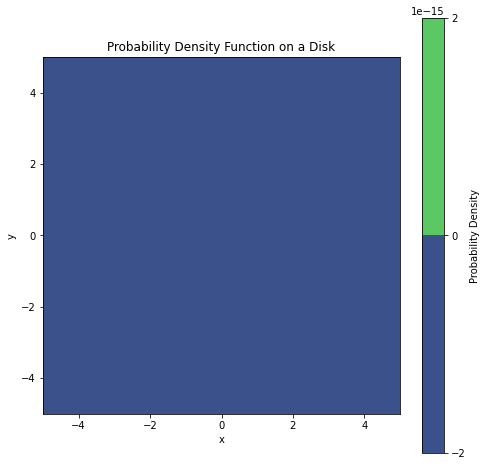

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の定義
a, b = 0, 0  # 円の中心
r = 5        # 半径
sigma = 1    # 正規分布の標準偏差

# 正規化定数Cを計算する関数
def compute_normalization_constant(r, sigma):
    C = (2 * np.pi * sigma**2 * (1 - np.exp(-r**2 / (2 * sigma**2))))**-1
    return C

# 確率密度関数f(x, y)を計算する関数
def probability_density_function(x, y, a, b, sigma, C):
    d = np.sqrt((x - a)**2 + (y - b)**2)
    if d > r:
        return 0
    return C * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-d**2 / (2 * sigma**2))

# 正規化定数を計算
C = compute_normalization_constant(r, sigma)

# グリッドの作成
x = np.linspace(a - r, a + r, 500)
y = np.linspace(b - r, b + r, 500)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: probability_density_function(x, y, a, b, sigma, C))(X, Y)

# プロット
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Probability Density Function on a Disk')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


積分結果: 0.0, 誤差: 1.843080695007604e-09


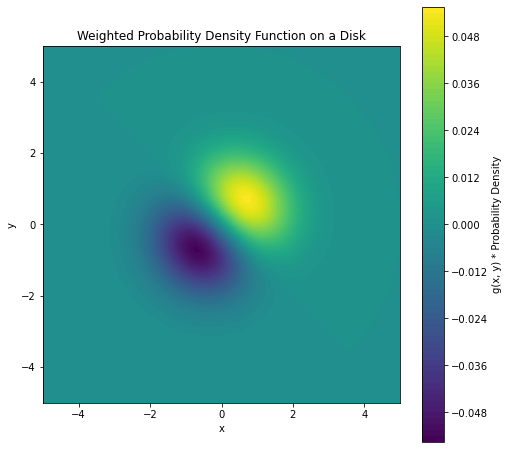

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# 定数の定義
a, b = 0, 0  # 円の中心
r = 5        # 半径
sigma = 1    # 正規分布の標準偏差

# 正規化定数Cを計算する関数
def compute_normalization_constant(r, sigma):
    C = (2 * np.pi * sigma**2 * (1 - np.exp(-r**2 / (2 * sigma**2))))**-1
    return C

# 確率密度関数f(x, y)を計算する関数
def probability_density_function(x, y, a, b, sigma, C):
    d = np.sqrt((x - a)**2 + (y - b)**2)
    if d > r:
        return 0
    return C * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-d**2 / (2 * sigma**2))

# 任意の関数g(x, y)を定義
def g(x, y):
    # ここにg(x, y)の定義を記述
    return x + y  # 例として単純な線形関数を使用

# 正規化定数を計算
C = compute_normalization_constant(r, sigma)

# 積分する関数を定義
def integrand(x, y, a, b, sigma, C):
    return g(x, y) * probability_density_function(x, y, a, b, sigma, C)

# 数値積分を実行
result, error = dblquad(lambda x, y: integrand(x, y, a, b, sigma, C),
                        b - r, b + r,  # yの範囲
                        lambda y: a - np.sqrt(r**2 - (y - b)**2),  # xの下限
                        lambda y: a + np.sqrt(r**2 - (y - b)**2))  # xの上限

print(f"積分結果: {result}, 誤差: {error}")

# グリッドの作成
x = np.linspace(a - r, a + r, 500)
y = np.linspace(b - r, b + r, 500)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: probability_density_function(x, y, a, b, sigma, C) * g(x, y))(X, Y)

# プロット
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(label='g(x, y) * Probability Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Probability Density Function on a Disk')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
